In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import wfdb
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
biodata_params = pd.read_csv("Bioage_data_params_table.csv", index_col=0)
biodata_params.dropna(subset=['age','age_group','sex'], inplace=True)
biodata_params.head()

,fname,age,age_group,sex,IMMEDIATE_CONTROL_OF_REGULATION,HEART_RATE,SDNN,RMSSD,STRESS_INDEX,TRIANGULAR_INDEX,...,R_S_RATIO_lead_V5,T_SYMMETRY_DERIVATIVES_lead_V1,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_V1,QRS_T_AREA_RATIO_lead_V1,R_S_RATIO_lead_II,R_T_RATIO_lead_AVR,R_P_RATIO_lead_AVR,QRS_T_AREA_RATIO_lead_AVR,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_AVR,T_SYMMETRY_DERIVATIVES_lead_AVR
0,A0002,49,40to49,Female,42.6,77.8,18.5,18.3,1056.0,36.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0016,14,1to17,Female,66.2,70.5,34.8,41.5,343.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0020,27,18to29,Female,56.8,71.1,26.6,25.2,337.0,22.2,...,40.3000,0.500,1.300,0.348,NaN,NaN,NaN,NaN,NaN,NaN
3,A0029,35,30to39,Female,24.0,71.9,26.7,29.6,424.0,30.0,...,0.0308,0.333,0.333,4.000,0.069,NaN,NaN,NaN,NaN,NaN
4,A0030,46,40to49,Male,60.6,61.2,33.8,40.4,326.0,27.3,...,0.0714,NaN,NaN,NaN,36.600,NaN,NaN,NaN,NaN,NaN


In [3]:
biodata_params.drop(columns = ['HEART_BIO_AGE_FROM', "HEART_BIO_AGE_TO"], inplace=True)

In [4]:
group_to_num = {'1to17':0,'18to29':1, '30to39':2, '40to49':3, '50to59':4, '60to69':5, '70to89':6, '90+':7 }
sex_to_num = {"Female":0, "Male":1}
group_to_num, sex_to_num

({'1to17': 0,
  '18to29': 1,
  '30to39': 2,
  '40to49': 3,
  '50to59': 4,
  '60to69': 5,
  '70to89': 6,
  '90+': 7},
 {'Female': 0, 'Male': 1})

In [5]:
group_to_num_reversed = {value: key for key,value in group_to_num.items()}
sex_to_num_reversed = {value: key for key,value in sex_to_num.items()}
group_to_num_reversed, sex_to_num_reversed

({0: '1to17',
  1: '18to29',
  2: '30to39',
  3: '40to49',
  4: '50to59',
  5: '60to69',
  6: '70to89',
  7: '90+'},
 {0: 'Female', 1: 'Male'})

In [6]:
nan_thresh = 0.2
drop_cols = biodata_params.columns[ (biodata_params.isna().sum().sort_values(ascending=False)/len(biodata_params))>= nan_thresh ].difference(['age',"age_group", "sex"])
drop_cols

Index(['ACTIVITY_OF_SUBCORTICAL_CENTERS', 'ACTIVITY_OF_VASOMOTOR_CENTERS',
       'CONDITION_OF_REGULATION_RESERVES', 'DFA', 'ENTROPY', 'FRACTAL_INDEX',
       'HEART_RATE', 'HF', 'IAE', 'IMMEDIATE_CONTROL_OF_REGULATION', 'LF',
       'LF_HF', 'LFn', 'PNN20', 'PNN50', 'RMSSD', 'SDNN', 'SDSD',
       'STRESS_INDEX', 'TOTAL_POWER', 'TRIANGULAR_INDEX', 'VLF', 'fname'],
      dtype='object')

In [7]:
biodata_params.drop(columns = drop_cols, inplace=True)
biodata_params.head()

,age,age_group,sex,HFn,INTEGRAL_INDICATOR_BY_IARS,IARS,STAMINA,ORGANIZATION_INDEX,MEAN,VHF,...,R_S_RATIO_lead_V5,T_SYMMETRY_DERIVATIVES_lead_V1,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_V1,QRS_T_AREA_RATIO_lead_V1,R_S_RATIO_lead_II,R_T_RATIO_lead_AVR,R_P_RATIO_lead_AVR,QRS_T_AREA_RATIO_lead_AVR,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_AVR,T_SYMMETRY_DERIVATIVES_lead_AVR
0,49,40to49,Female,94.8,43.0,7.0,45.5,0.862,771.0,30.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,1to17,Female,83.5,100.0,3.0,67.8,0.760,851.0,52.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,18to29,Female,52.2,100.0,3.0,64.3,0.751,844.0,16.4,...,40.3000,0.500,1.300,0.348,NaN,NaN,NaN,NaN,NaN,NaN
3,35,30to39,Female,95.7,68.0,5.0,50.7,0.767,834.0,65.9,...,0.0308,0.333,0.333,4.000,0.069,NaN,NaN,NaN,NaN,NaN
4,46,40to49,Male,92.1,68.0,5.0,60.8,0.736,980.0,19.2,...,0.0714,NaN,NaN,NaN,36.600,NaN,NaN,NaN,NaN,NaN


In [8]:
biodata_params.columns[ biodata_params.dtypes == 'object' ]

Index(['age_group', 'sex'], dtype='object')

In [9]:
biodata_params['age_group'] = biodata_params['age_group'].apply(lambda x: group_to_num[x])
biodata_params['sex'] = biodata_params['sex'].apply(lambda x: sex_to_num[x])
biodata_params

,age,age_group,sex,HFn,INTEGRAL_INDICATOR_BY_IARS,IARS,STAMINA,ORGANIZATION_INDEX,MEAN,VHF,...,R_S_RATIO_lead_V5,T_SYMMETRY_DERIVATIVES_lead_V1,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_V1,QRS_T_AREA_RATIO_lead_V1,R_S_RATIO_lead_II,R_T_RATIO_lead_AVR,R_P_RATIO_lead_AVR,QRS_T_AREA_RATIO_lead_AVR,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_AVR,T_SYMMETRY_DERIVATIVES_lead_AVR
0,49,3,0,94.8,43.0,7.0,45.5,0.862,771.0,30.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,0,0,83.5,100.0,3.0,67.8,0.760,851.0,52.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,1,0,52.2,100.0,3.0,64.3,0.751,844.0,16.40,...,40.3000,0.500,1.300,0.348,NaN,NaN,NaN,NaN,NaN,NaN
3,35,2,0,95.7,68.0,5.0,50.7,0.767,834.0,65.90,...,0.0308,0.333,0.333,4.000,0.0690,NaN,NaN,NaN,NaN,NaN
4,46,3,1,92.1,68.0,5.0,60.8,0.736,980.0,19.20,...,0.0714,NaN,NaN,NaN,36.6000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14860,38,2,0,95.2,100.0,3.0,63.3,0.898,921.0,211.00,...,6.1400,0.667,1.500,1.000,0.0435,NaN,NaN,NaN,NaN,NaN
14861,43,3,1,93.9,100.0,3.0,46.9,0.846,817.0,1.85,...,0.0183,NaN,NaN,NaN,10.0000,NaN,NaN,NaN,NaN,NaN
14862,52,4,0,84.9,68.0,5.0,60.2,0.739,802.0,56.90,...,82.8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14863,48,3,0,87.0,68.0,5.0,66.0,0.623,725.0,88.20,...,6.4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
biodata_params1 = biodata_params[['age', 'age_group']]

In [13]:
biodata_params2 = biodata_params.drop(['age', 'age_group'], axis=1)

In [14]:
df_normalized = pd.DataFrame(scaler.fit_transform(biodata_params2), columns = biodata_params2.columns)

In [15]:
df_normalized.head()

,sex,HFn,INTEGRAL_INDICATOR_BY_IARS,IARS,STAMINA,ORGANIZATION_INDEX,MEAN,VHF,VHFn,SDNNc,...,R_S_RATIO_lead_V5,T_SYMMETRY_DERIVATIVES_lead_V1,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_V1,QRS_T_AREA_RATIO_lead_V1,R_S_RATIO_lead_II,R_T_RATIO_lead_AVR,R_P_RATIO_lead_AVR,QRS_T_AREA_RATIO_lead_AVR,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_AVR,T_SYMMETRY_DERIVATIVES_lead_AVR
0,0.0,0.947406,0.304878,0.777778,0.455,0.756614,0.420898,0.001792,0.002416,0.115894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.833114,1.000000,0.333333,0.678,0.576720,0.499023,0.003094,0.000412,0.099338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.516537,1.000000,0.333333,0.643,0.560847,0.492188,0.000970,0.000217,0.092715,...,0.011927,0.008867,0.012084,0.005412,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.956509,0.609756,0.555556,0.507,0.589065,0.482422,0.003898,0.001253,0.109272,...,0.000009,0.005576,0.002305,0.073748,0.000028,NaN,NaN,NaN,NaN,NaN
4,1.0,0.920097,0.609756,0.555556,0.608,0.534392,0.625000,0.001136,0.000109,0.132450,...,0.000021,NaN,NaN,NaN,0.014764,NaN,NaN,NaN,NaN,NaN


In [16]:
biodata_params = pd.concat([biodata_params1, df_normalized], axis=1)

In [17]:
biodata_params

,age,age_group,sex,HFn,INTEGRAL_INDICATOR_BY_IARS,IARS,STAMINA,ORGANIZATION_INDEX,MEAN,VHF,...,R_S_RATIO_lead_V5,T_SYMMETRY_DERIVATIVES_lead_V1,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_V1,QRS_T_AREA_RATIO_lead_V1,R_S_RATIO_lead_II,R_T_RATIO_lead_AVR,R_P_RATIO_lead_AVR,QRS_T_AREA_RATIO_lead_AVR,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_AVR,T_SYMMETRY_DERIVATIVES_lead_AVR
0,49,3,0.0,0.947406,0.304878,0.777778,0.455,0.756614,0.420898,0.001792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,0,0.0,0.833114,1.000000,0.333333,0.678,0.576720,0.499023,0.003094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,1,0.0,0.516537,1.000000,0.333333,0.643,0.560847,0.492188,0.000970,...,0.011927,0.008867,0.012084,0.005412,NaN,NaN,NaN,NaN,NaN,NaN
3,35,2,0.0,0.956509,0.609756,0.555556,0.507,0.589065,0.482422,0.003898,...,0.000009,0.005576,0.002305,0.073748,0.000028,NaN,NaN,NaN,NaN,NaN
4,46,3,1.0,0.920097,0.609756,0.555556,0.608,0.534392,0.625000,0.001136,...,0.000021,NaN,NaN,NaN,0.014764,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14860,38,2,0.0,0.951451,1.000000,0.333333,0.633,0.820106,0.567383,0.012482,...,0.001817,0.012158,0.014106,0.017612,0.000017,NaN,NaN,NaN,NaN,NaN
14861,43,3,1.0,0.938303,1.000000,0.333333,0.469,0.728395,0.465820,0.000109,...,0.000005,NaN,NaN,NaN,0.004034,NaN,NaN,NaN,NaN,NaN
14862,52,4,0.0,0.847274,0.609756,0.555556,0.602,0.539683,0.451172,0.003366,...,0.024504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14863,48,3,0.0,0.868514,0.609756,0.555556,0.660,0.335097,0.375977,0.005217,...,0.001903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = SimpleImputer()
biodata_params = pd.DataFrame(data = imputer.fit_transform(biodata_params),
                              columns = biodata_params.columns)
biodata_params['age_group'] = biodata_params['age_group'].astype(int)
biodata_params

,age,age_group,sex,HFn,INTEGRAL_INDICATOR_BY_IARS,IARS,STAMINA,ORGANIZATION_INDEX,MEAN,VHF,...,R_S_RATIO_lead_V5,T_SYMMETRY_DERIVATIVES_lead_V1,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_V1,QRS_T_AREA_RATIO_lead_V1,R_S_RATIO_lead_II,R_T_RATIO_lead_AVR,R_P_RATIO_lead_AVR,QRS_T_AREA_RATIO_lead_AVR,T_SYMMETRY_AREAS_OF_TRIANGLES_lead_AVR,T_SYMMETRY_DERIVATIVES_lead_AVR
0,49.0,3,0.0,0.947406,0.304878,0.777778,0.455,0.756614,0.420898,0.001792,...,0.002178,0.013304,0.035450,0.053167,0.005219,0.063744,0.029914,0.360368,0.323077,0.414105
1,14.0,0,0.0,0.833114,1.000000,0.333333,0.678,0.576720,0.499023,0.003094,...,0.002178,0.013304,0.035450,0.053167,0.005219,0.063744,0.029914,0.360368,0.323077,0.414105
2,27.0,1,0.0,0.516537,1.000000,0.333333,0.643,0.560847,0.492188,0.000970,...,0.011927,0.008867,0.012084,0.005412,0.005219,0.063744,0.029914,0.360368,0.323077,0.414105
3,35.0,2,0.0,0.956509,0.609756,0.555556,0.507,0.589065,0.482422,0.003898,...,0.000009,0.005576,0.002305,0.073748,0.000028,0.063744,0.029914,0.360368,0.323077,0.414105
4,46.0,3,1.0,0.920097,0.609756,0.555556,0.608,0.534392,0.625000,0.001136,...,0.000021,0.013304,0.035450,0.053167,0.014764,0.063744,0.029914,0.360368,0.323077,0.414105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14860,38.0,2,0.0,0.951451,1.000000,0.333333,0.633,0.820106,0.567383,0.012482,...,0.001817,0.012158,0.014106,0.017612,0.000017,0.063744,0.029914,0.360368,0.323077,0.414105
14861,43.0,3,1.0,0.938303,1.000000,0.333333,0.469,0.728395,0.465820,0.000109,...,0.000005,0.013304,0.035450,0.053167,0.004034,0.063744,0.029914,0.360368,0.323077,0.414105
14862,52.0,4,0.0,0.847274,0.609756,0.555556,0.602,0.539683,0.451172,0.003366,...,0.024504,0.013304,0.035450,0.053167,0.005219,0.063744,0.029914,0.360368,0.323077,0.414105
14863,48.0,3,0.0,0.868514,0.609756,0.555556,0.660,0.335097,0.375977,0.005217,...,0.001903,0.013304,0.035450,0.053167,0.005219,0.063744,0.029914,0.360368,0.323077,0.414105


In [19]:
from sklearn import tree

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [21]:
X = biodata_params.drop(['age', 'age_group'], axis=1)
y = biodata_params[['age_group']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [23]:
max_depth_values = list(range(1, 100, 10))

In [24]:
scores_data = pd.DataFrame()

In [25]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [cross_val_score]})
    scores_data = scores_data.append(temp_score_data)


In [26]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.238143,0.232762,<function cross_val_score at 0x000001BB97C75790>
0,11,0.940464,0.712748,<function cross_val_score at 0x000001BB97C75790>
0,21,1.000000,0.715103,<function cross_val_score at 0x000001BB97C75790>
0,31,1.000000,0.709721,<function cross_val_score at 0x000001BB97C75790>
0,41,1.000000,0.714094,<function cross_val_score at 0x000001BB97C75790>


In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
scores_data_long = pd.melt(scores_data,
                          id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type',
                          value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

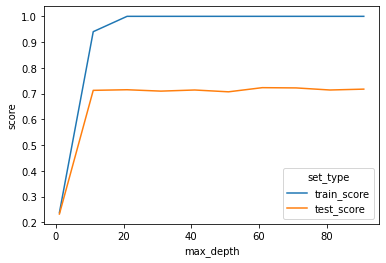

In [29]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)